In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [41]:
df1 = pd.read_csv('data/3 - India_GDP_Historical_Data.csv')
df2 = pd.read_csv('data/9 - India_Inflation_Rate_Historical_Data.csv')

df1.drop('Unnamed: 0', axis = 1, inplace=True)
df2.drop('Unnamed: 0', axis = 1, inplace=True)

In [103]:
df1.head()

,year,Per_Capita,GDP,Growth_Rate,decade
index,,,,,
0,2022,3416.65,2411,7.24,2020
1,2021,3150.31,2238,9.05,2020
2,2020,2671.60,1913,-5.83,2020
3,2019,2835.61,2050,3.87,2010
4,2018,2702.93,1974,6.45,2010


In [49]:
def clean_data(column):
    return pd.to_numeric(column.replace('[\$,B%]', '', regex=True))

df1['GDP'] = clean_data(df1['GDP'])
df1['Per_Capita'] = clean_data(df1['Per_Capita'])
df1['Growth_Rate'] = clean_data(df1['Growth_Rate'])

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ritika sahoo\AppData\Local\Temp\ipykernel_9192\1412853438.py:2: SyntaxWarning: invalid escape sequence '\$'
  return pd.to_numeric(column.replace('[\$,B%]', '', regex=True))


In [51]:
df1.describe()

,year,Per_Capita,GDP,Growth_Rate
count,63.000000,63.000000,63.000000,63.000000
mean,1991.000000,741.933175,627.619048,5.058571
std,18.330303,925.147412,646.537438,3.262885
min,1960.000000,37.030000,83.000000,-5.830000
25%,1975.500000,101.125000,162.000000,3.760000
50%,1991.000000,296.040000,346.000000,5.710000
75%,2006.500000,1069.580000,898.000000,7.500000
max,2022.000000,3416.650000,2411.000000,9.630000


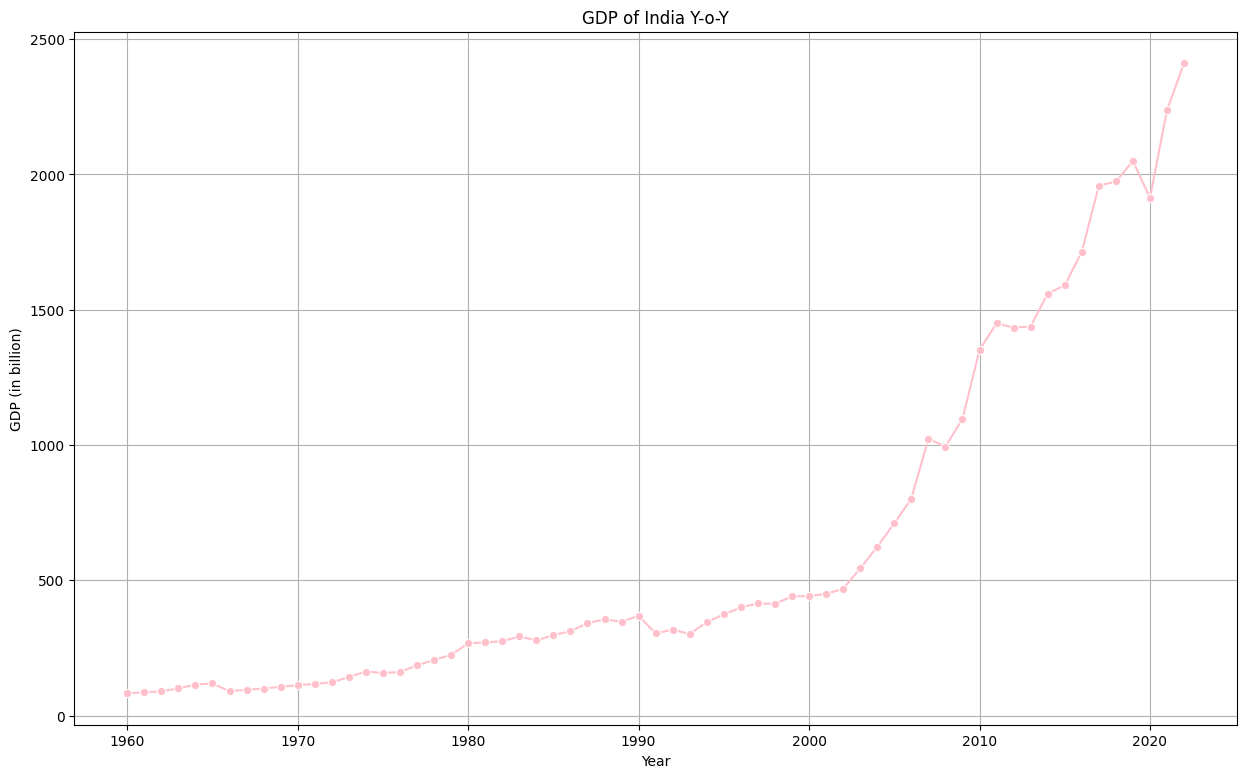

In [92]:
# Growth over time on yearly basis

plt.figure(figsize = (15,9))
sns.lineplot(x='year', y='GDP', data = df1, marker= 'o', color = 'pink')
plt.title('GDP of India Y-o-Y')
plt.xlabel('Year')
plt.ylabel('GDP (in billion)')
plt.grid(True)
plt.show()

<Axes: xlabel='decade', ylabel='Growth_Rate'>

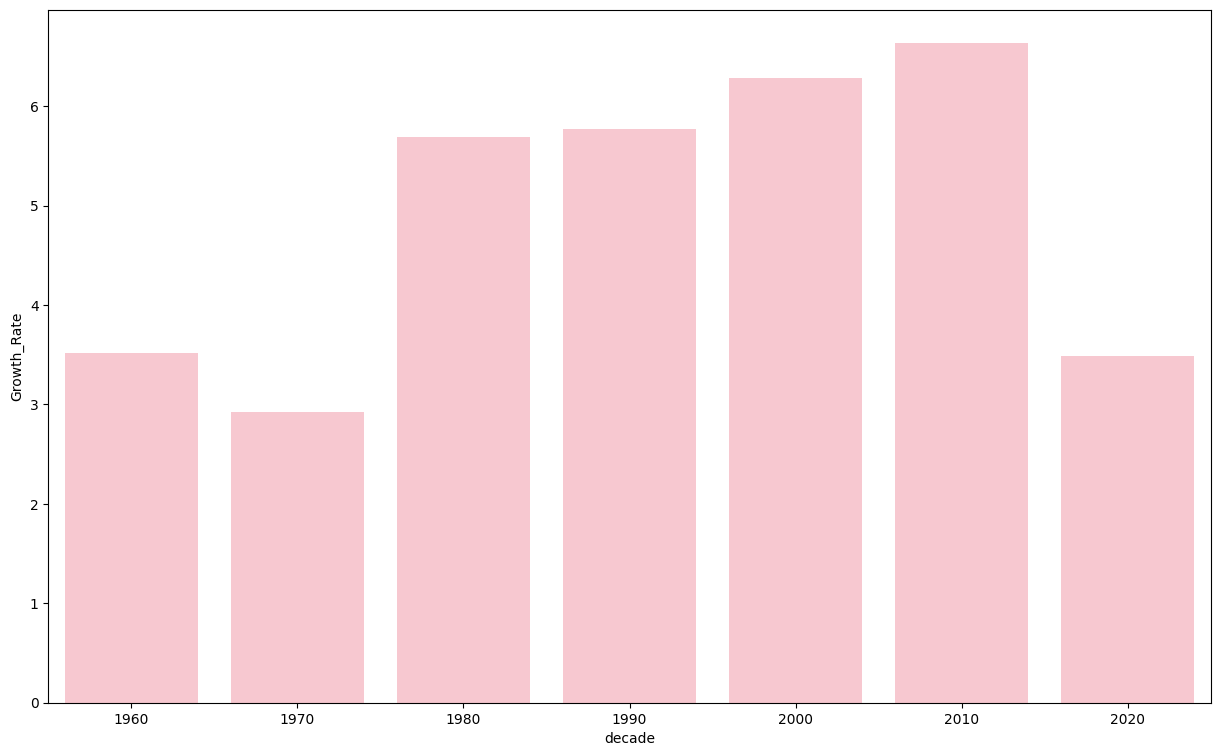

In [93]:
df1['decade'] = (df1['year'] // 10) * 10

decade_group = df1.groupby('decade')['Growth_Rate'].mean().reset_index()

#plot the date

plt.figure(figsize = (15,9))
sns.barplot(x='decade', y='Growth_Rate', data = decade_group, color = 'pink')
            

India's economic growth saw a dip below 3% in the 1970s but recovered in the following decades, reaching above 6% in the 2000s and 2010s. The global slowdown of 2020 impacted the economy, and the future growth trajectory remains to be seen.

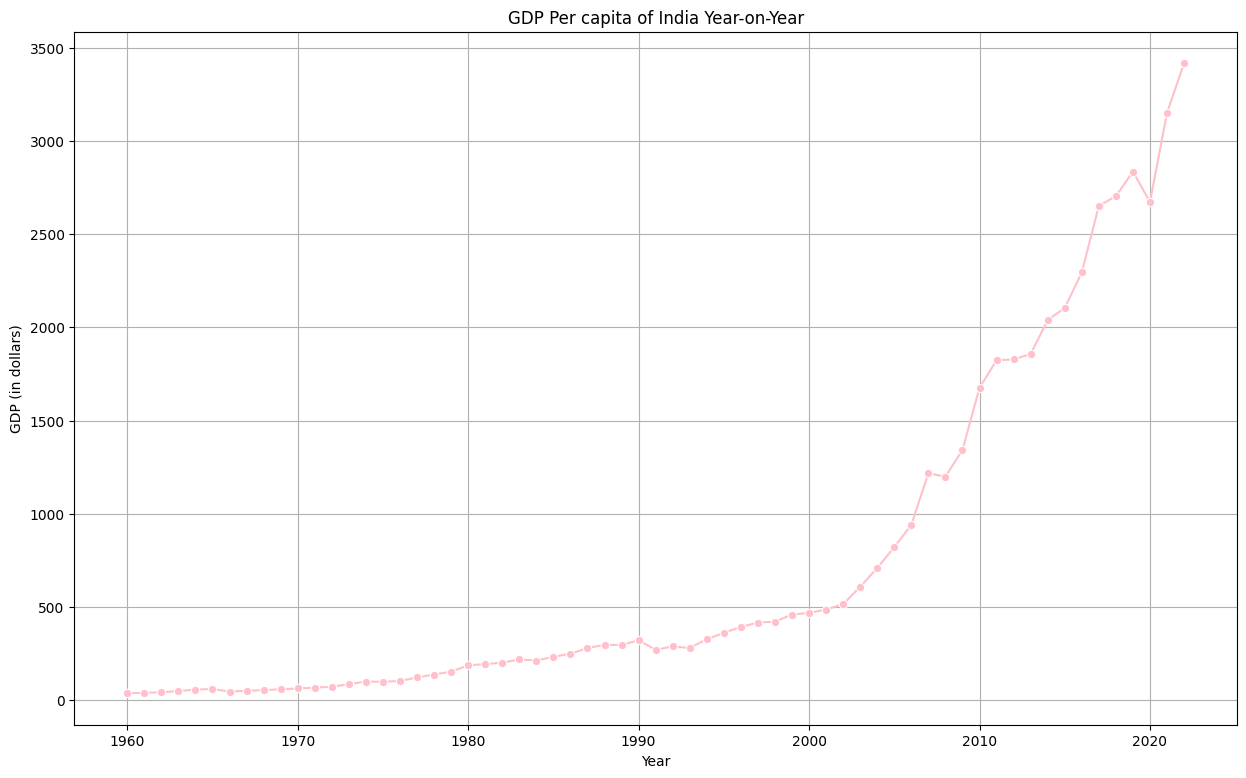

In [94]:
plt.figure(figsize=(15,9))
sns.lineplot(x='year', y='Per_Capita', data=df1, marker='o', color='pink')
plt.title("GDP Per capita of India Year-on-Year")
plt.xlabel('Year')
plt.ylabel('GDP (in dollars)')
plt.grid(True)
plt.show()

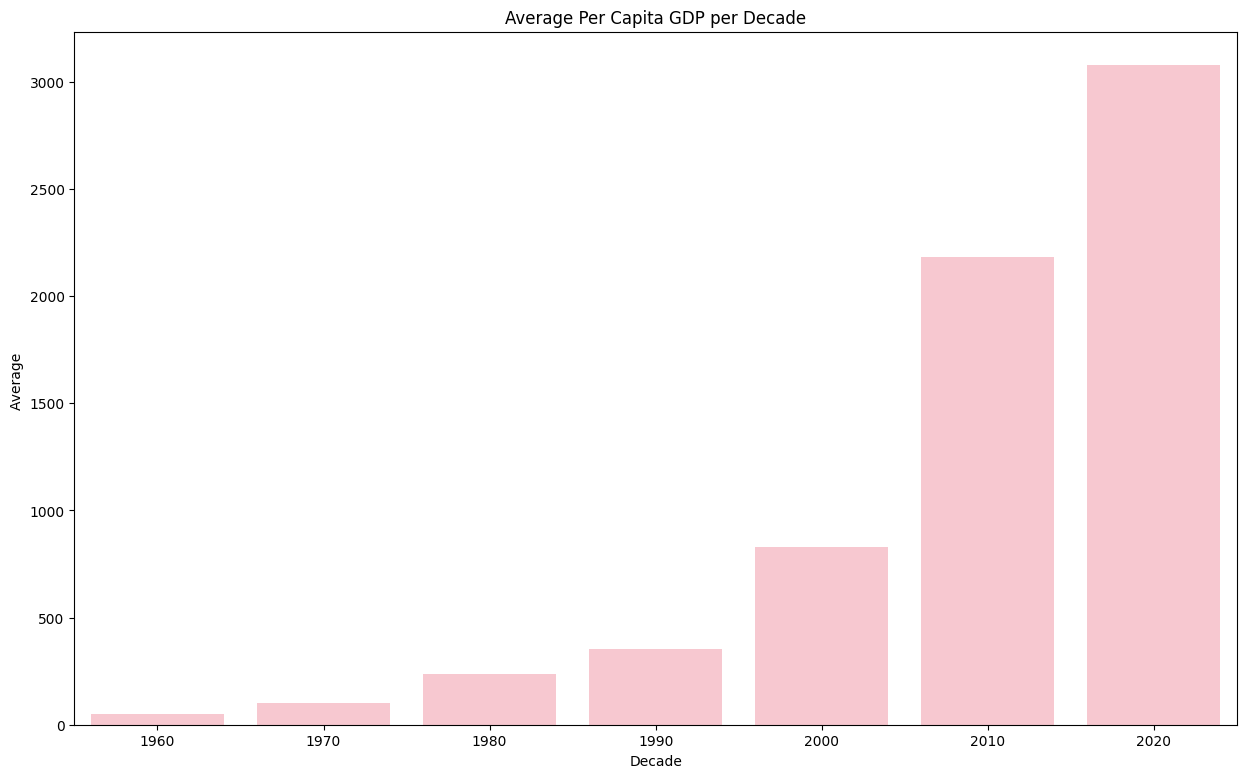

In [95]:
decade_group = df1.groupby('decade')['Per_Capita'].mean().reset_index()

plt.figure(figsize=(15, 9))
sns.barplot(x='decade', y='Per_Capita', data=decade_group , color = 'pink')
plt.title('Average Per Capita GDP per Decade')
plt.xlabel('Decade')
plt.ylabel('Average ')
plt.show()

India's per capita income soared from below $1,000 in the 2000s to over $2,000 in the 2010s, potentially due to the IT sector's rise. While GDP growth is a key metric, it's crucial to analyze inflation alongside per capita income to assess if it effectively translates to improved purchasing power for Indian citizens.

In [81]:
df2.head()

,year,Inflation_Rate,Annual_percent_geowth
0,2022,6.70%,1.57%
1,2021,5.13%,-1.49%
2,2020,6.62%,2.89%
3,2019,3.73%,-0.21%
4,2018,3.94%,0.61%


In [86]:
def clean_data(column):
    return pd.to_numeric(column.replace('[B%]', '', regex=True))

df2['Inflation_Rate'] = clean_data(df2['Inflation_Rate'])
df2['Annual_percent_geowth'] = clean_data(df2['Annual_percent_geowth'])


In [96]:
df2.describe()

,year,Inflation_Rate,Annual_percent_geowth
count,63.000000,63.000000,63.000000
mean,1991.000000,7.365714,0.077619
std,18.330303,4.869070,5.532421
min,1960.000000,-7.630000,-22.850000
25%,1975.500000,4.130000,-1.910000
50%,1991.000000,6.670000,0.070000
75%,2006.500000,9.750000,2.120000
max,2022.000000,28.600000,15.940000


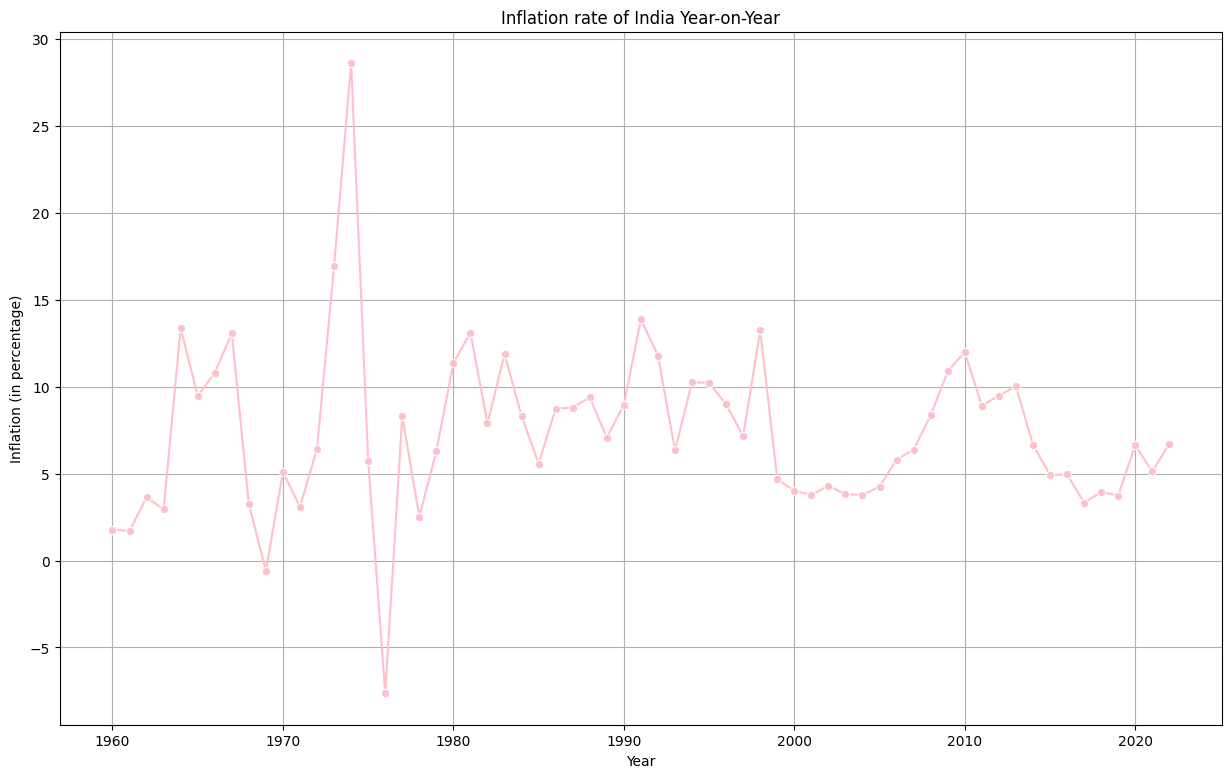

In [115]:
plt.figure(figsize=(15,9))
sns.lineplot(x='year', y='Inflation_Rate', data=df2, marker='o', color='pink')
plt.title("Inflation rate of India Year-on-Year")
plt.xlabel('Year')
plt.ylabel('Inflation (in percentage)')
plt.grid(True)
plt.show()

The 1970s stand out as a decade of extremes, recording both the nation's highest and lowest inflation rates (occurring in 1974 and 1976, respectively).

In [111]:
highest_inflation_rate = df2['Inflation_Rate'].idxmax()
year_high = df2.loc[highest_inflation_rate]

lowest_inflation_rate = df2['Inflation_Rate'].idxmin()
year_low = df2.loc[lowest_inflation_rate]

print(year_high)
print(year_low)

year                     1974.00
Inflation_Rate             28.60
Annual_percent_geowth      11.66
Name: 48, dtype: float64
year                     1976.00
Inflation_Rate             -7.63
Annual_percent_geowth     -13.38
Name: 46, dtype: float64


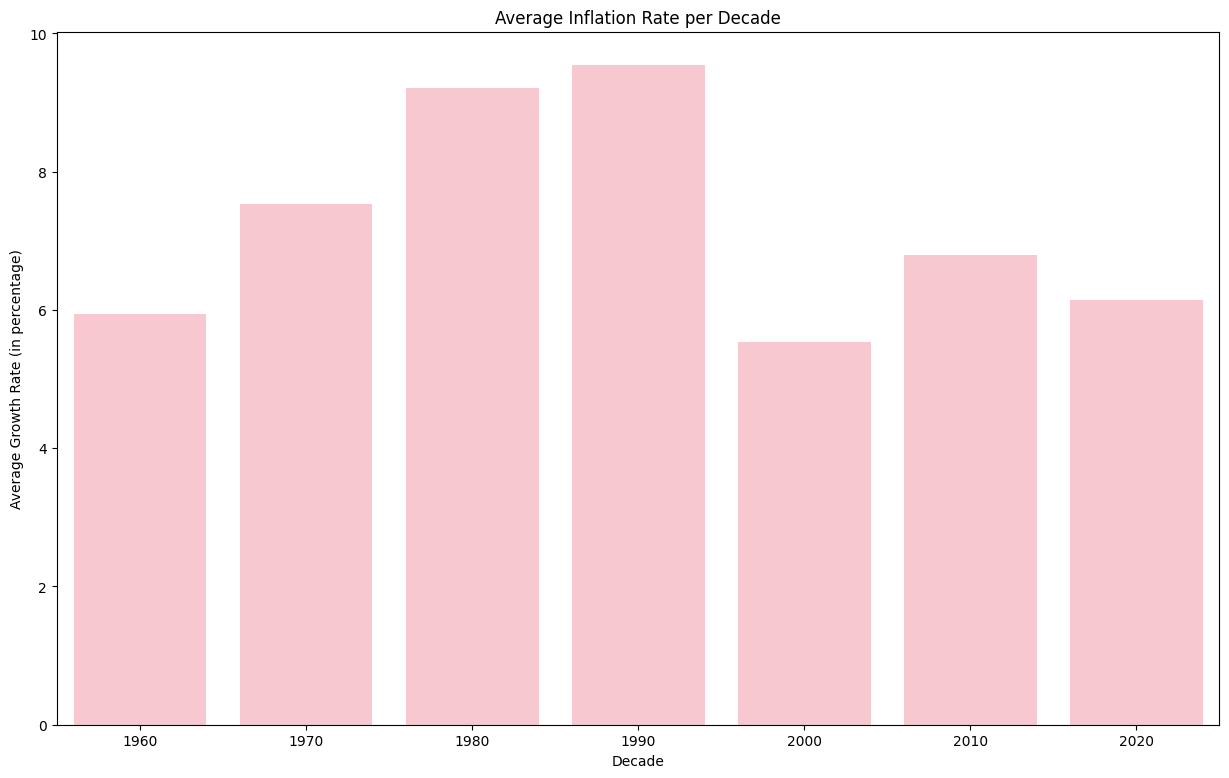

In [114]:
df2['decade'] = (df2['year'] // 10) * 10

decade_group = df2.groupby('decade')['Inflation_Rate'].mean().reset_index()

plt.figure(figsize=(15, 9))
sns.barplot(x='decade', y='Inflation_Rate', data=decade_group, color = 'pink')
plt.title('Average Inflation Rate per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Growth Rate (in percentage)')
plt.show()

The 1990s were characterized by a relatively elevated inflation rate, approaching 10%. However, a subsequent period of effective policy measures in the 2000s demonstrably curbed inflation, driving it down below 5%. While inflationary pressures reemerged somewhat in the 2010s, exceeding 6%, the overall trajectory reflects a commendable improvement in price stability.

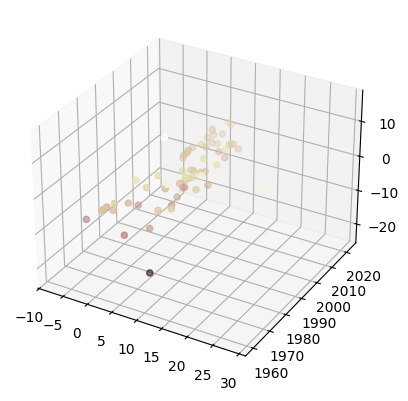

In [128]:
ax = plt.axes(projection='3d')
ydata = df2['year']
xdata = df2['Inflation_Rate']
zdata = df2['Annual_percent_geowth']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap ='pink')